In [1]:
from yt_dlp import YoutubeDL
import os
import matplotlib
import pylab
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('cleaned_4500.csv')
df

,artist,name,url,yt_links,Genre
0,Mariah Carey,All I Want for Christmas Is You,https://www.last.fm/music/Mariah+Carey/_/All+I...,https://www.youtube.com/watch?v=yXQViqx6GMY,pop
1,Olivia Rodrigo,good 4 u,https://www.last.fm/music/Olivia+Rodrigo/_/goo...,https://www.youtube.com/watch?v=gNi_6U5Pm_o,pop
2,Doja Cat,Kiss Me More (feat. SZA),https://www.last.fm/music/Doja+Cat/_/Kiss+Me+M...,https://www.youtube.com/watch?v=0EVVKs6DQLo,pop
3,Wham!,Last Christmas,https://www.last.fm/music/Wham%21/_/Last+Chris...,https://www.youtube.com/watch?v=E8gmARGvPlI,pop
4,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),https://www.last.fm/music/Lil+Nas+X/_/INDUSTRY...,https://www.youtube.com/watch?v=UTHLKHL_whs,pop
...,...,...,...,...,...
4456,Baby Keem,booman,https://www.last.fm/music/Baby+Keem/_/booman,https://www.youtube.com/watch?v=Q3oIiiCFCSw,rap
4457,The Proclaimers,I'm Gonna Be (500 Miles),https://www.last.fm/music/The+Proclaimers/_/I%...,https://www.youtube.com/watch?v=tbNlMtqrYS0,pop
4458,Bruno Mars,Versace on the Floor,https://www.last.fm/music/Bruno+Mars/_/Versace...,https://www.youtube.com/watch?v=-FyjEnoIgTM,pop
4459,Kanye West,Never Let Me Down,https://www.last.fm/music/Kanye+West/_/Never+L...,https://www.youtube.com/watch?v=p4NvOKy7GOU,rap


In [3]:
df['yt_links'][1]

'https://www.youtube.com/watch?v=gNi_6U5Pm_o'

In [ ]:
from IPython.core.display import clear_output
from os import path, remove
from memory_profiler import profile
matplotlib.use('Agg') # No pictures displayed 

import soundfile as sf

@profile
def get_spec_url(i):
    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
        'outtmpl': 'downloads' + f'/{i}.%(ext)s'
    }
    
    with YoutubeDL(ydl_opts) as ydl:
        print("DL song {}/{}".format(i, len(df['yt_links'])))
        try:
            ydl.download([df['yt_links'][i]])
            del(ydl)
        except Exception:
            ls.append(i)
    
    clear_output(wait = True)
    fname = f"downloads/{i}.wav"
    if os.path.isfile(fname):
        sig, fs = librosa.load(fname)   
        # make pictures name 
        save_path = f"specs/{i}.jpg"
        pylab.axis('off') # no axis
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
        S = librosa.feature.melspectrogram(y=sig, sr=fs)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
        pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
        
        os.remove(fname)
ls = list()
#for i, link in enumerate(df['yt_links']):
k = 977
while k <= len(df['yt_links']):
    get_spec_url(k)
    k+=1

ERROR: Could not find file C:\Users\MAXDUD~1\AppData\Local\Temp/ipykernel_7892/514143842.py
DL song 999/4461
[youtube] jr47YisIsz8: Downloading webpage
[youtube] jr47YisIsz8: Downloading android player API JSON
[info] jr47YisIsz8: Downloading 1 format(s): 251
[download] Destination: downloads\999.webm
[download]   8.3% of 3.01MiB at 565.37KiB/s ETA 00:05

In [ ]:
y, sr = librosa.load("downloads/1.wav")
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

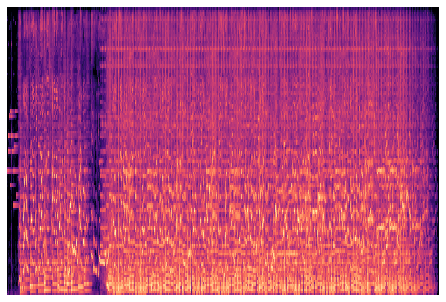